# Adult Census Data Analysis
## Comprehensive Income Pattern Investigation

### Author: Mahad
- `Dataset`: https://docs.google.com/spreadsheets/d/1VboQYqf0sKWzRhOJ35H_K-4M5P6_GJv6_A6yVbFPtj0/edit?usp=sharing 
- `Date`: 13-Sep-2025

This notebook provides an in-depth analysis of the Adult Census dataset to understand income patterns and demographic factors affecting earnings. We'll explore five key research questions using modern visualizations and statistical analysis.

**Dataset Overview:**
- **Source**: Adult Census Income dataset
- **Size**: ~32K records with demographic and economic features
- **Target**: Income classification (<=50K vs >50K annually)
- **Goal**: Understand factors influencing income levels

**Research Questions:**
1. What is the overall income distribution and key statistics?
2. How does age correlate with income levels across different age groups?
3. Which education levels provide the highest income potential?
4. How do work patterns and occupation types affect earnings?
5. What are the demographic patterns in high vs low income groups?

## Import Required Libraries and Setup

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

# Configure plotting parameters
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pyo.init_notebook_mode(connected=True)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Warning suppression
import warnings
warnings.filterwarnings('ignore')

print(" All libraries imported successfully!")
print(" Analysis environment ready for Adult Census dataset investigation")

✅ All libraries imported successfully!
📊 Analysis environment ready for Adult Census dataset investigation


##  Data Loading and Initial Exploration

In [ ]:
# Load the dataset
df = pd.read_csv("Mahad Z - adult.csv")

print(" DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n Column Information:")
print(df.info())

print("\n First Few Records:")
df.head()

🎯 DATASET OVERVIEW
Dataset Shape: 32,561 rows × 15 columns
Memory Usage: 19.88 MB

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usa

age workclass  fnlwgt     education  education.num marital.status         occupation   relationship   race     sex  capital.gain  capital.loss  hours.per.week native.country income
0   90         ?   77053       HS-grad              9        Widowed                  ?  Not-in-family  White  Female             0          4356              40  United-States  <=50K
1   82   Private  132870       HS-grad              9        Widowed    Exec-managerial  Not-in-family  White  Female             0          4356              18  United-States  <=50K
2   66         ?  186061  Some-college             10        Widowed                  ?      Unmarried  Black  Female             0          4356              40  United-States  <=50K
3   54   Private  140359       7th-8th              4       Divorced  Machine-op-inspct      Unmarried  White  Female             0          3900              40  United-States  <=50K
4   41   Private  264663  Some-college             10      Separated     Prof-specialty      Own-child  White  Female             0          3900              40  United-States  <=50K

##  Data Cleaning and Preprocessing

In [ ]:
# Create a copy for processing
df_clean = df.copy()

print(" Missing Values Analysis:")
print("=" * 30)

# Check for missing values and '?' entries
missing_summary = pd.DataFrame({
    'Total_Missing': df_clean.isnull().sum(),
    'Question_Marks': df_clean.apply(lambda x: (x == '?').sum() if x.dtype == 'object' else 0),
    'Percentage': (df_clean.isnull().sum() / len(df_clean)) * 100
})
missing_summary['Total_Issues'] = missing_summary['Total_Missing'] + missing_summary['Question_Marks']
print(missing_summary)

# Replace '?' with NaN for proper handling
print("\n Data Cleaning Steps:")
df_clean = df_clean.replace('?', np.nan)

# Convert numeric columns
numeric_cols = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Clean categorical variables - strip whitespace
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype(str).str.strip()

# Focus on records with complete age and income data for analysis
df_analysis = df_clean.dropna(subset=['age', 'income']).copy()

print(f" Cleaned dataset shape: {df_analysis.shape[0]:,} rows × {df_analysis.shape[1]} columns")
print(f" Removed {df.shape[0] - df_analysis.shape[0]:,} incomplete records")
print(f" Analysis dataset ready with {df_analysis.shape[0]:,} complete records")

🔍 Missing Values Analysis:
                Total_Missing  Question_Marks  Percentage  Total_Issues
age                         0               0         0.0             0
workclass                   0            1836         0.0          1836
fnlwgt                      0               0         0.0             0
education                   0               0         0.0             0
education.num               0               0         0.0             0
marital.status              0               0         0.0             0
occupation                  0            1843         0.0          1843
relationship                0               0         0.0             0
race                        0               0         0.0             0
sex                         0               0         0.0             0
capital.gain                0               0         0.0             0
capital.loss                0               0         0.0             0
hours.per.week              0        

## Question 1: Income Distribution Analysis
### *What is the overall income distribution and key statistics?*

📊 INCOME DISTRIBUTION STATISTICS
<=50K: 24,720 people (75.9%)
>50K: 7,841 people (24.1%)


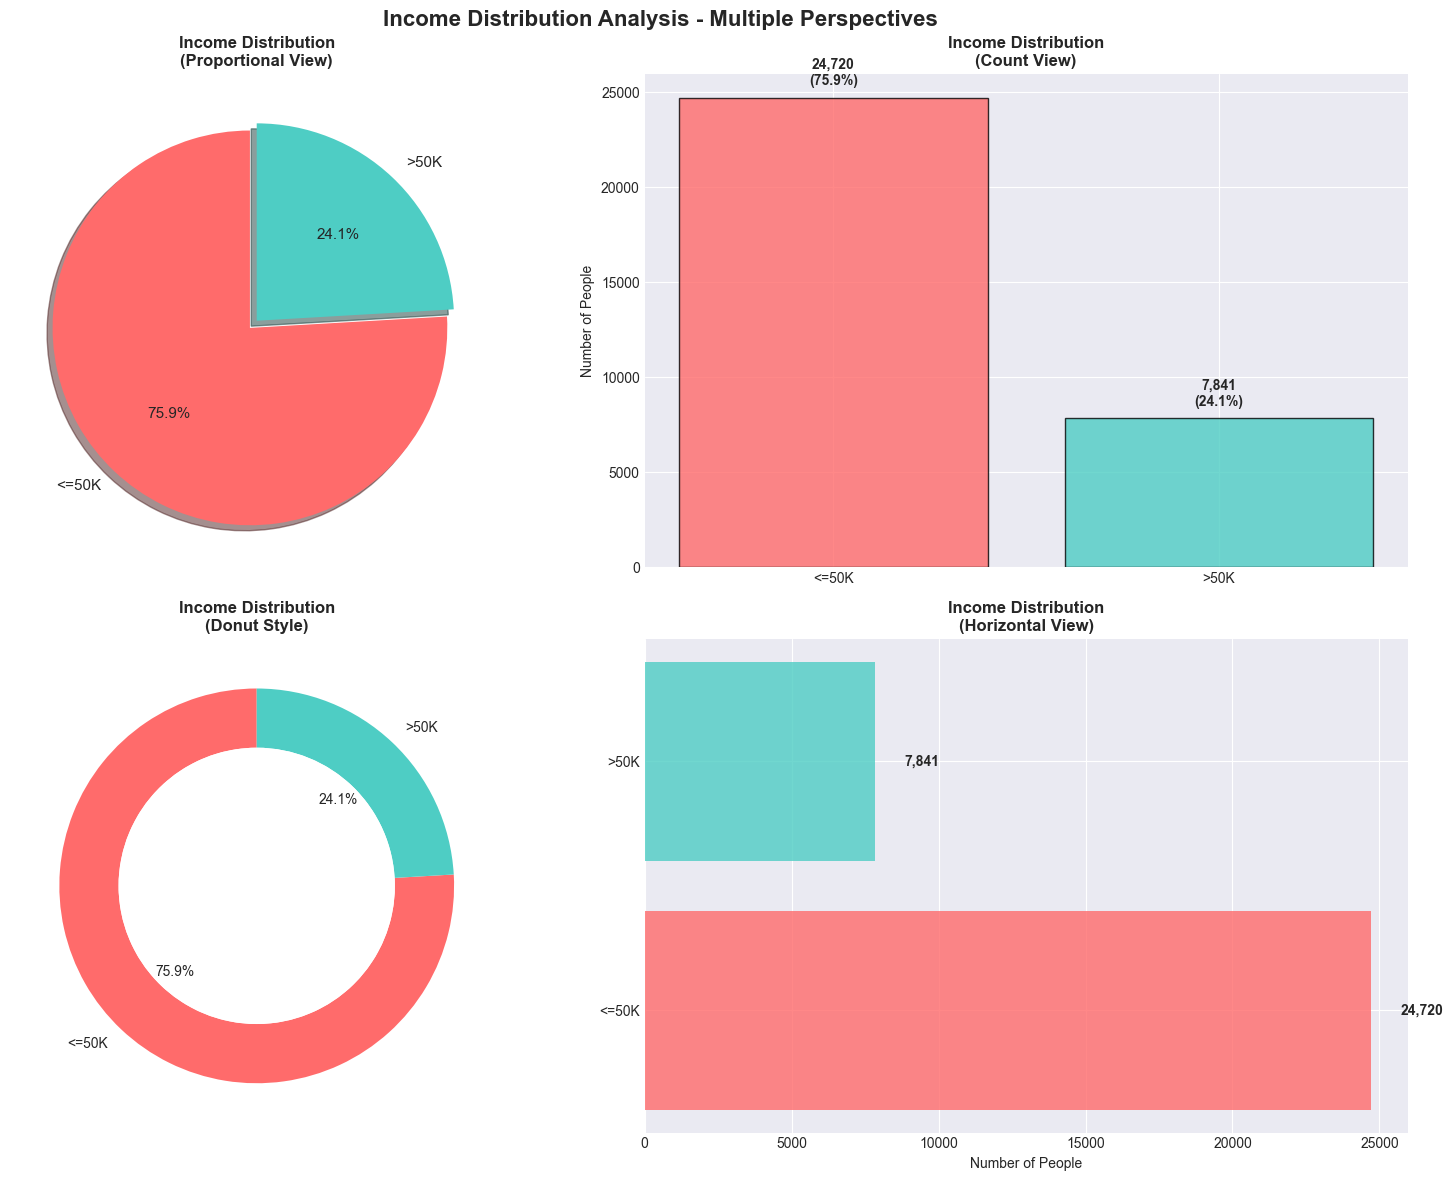


📈 KEY INSIGHTS:
• Total sample size: 32,561 individuals
• High earners (>50K): 7,841 people (24.1%)
• Low earners (≤50K): 24,720 people (75.9%)
• Income inequality ratio: 3.2:1


In [9]:
# Income distribution analysis
income_counts = df_analysis['income'].value_counts()
income_percentages = df_analysis['income'].value_counts(normalize=True) * 100

print("📊 INCOME DISTRIBUTION STATISTICS")
print("=" * 40)
for income_level, count in income_counts.items():
    percentage = income_percentages[income_level]
    print(f"{income_level}: {count:,} people ({percentage:.1f}%)")

# Create enhanced visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Income Distribution Analysis - Multiple Perspectives', fontsize=16, fontweight='bold')

# 1. Modern Pie Chart
colors = ['#FF6B6B', '#4ECDC4']
wedges, texts, autotexts = ax1.pie(income_counts.values, labels=income_counts.index, 
                                   autopct='%1.1f%%', startangle=90, colors=colors,
                                   explode=(0.05, 0), shadow=True, textprops={'fontsize': 11})
ax1.set_title('Income Distribution\n(Proportional View)', fontsize=12, fontweight='bold')

# 2. Bar Chart with annotations
bars = ax2.bar(income_counts.index, income_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax2.set_title('Income Distribution\n(Count View)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of People')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{height:,}\n({income_percentages.iloc[i]:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

# 3. Donut Chart styled
circle = plt.Circle((0,0), 0.70, fc='white')
ax3.pie(income_counts.values, labels=income_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, wedgeprops=dict(width=0.3))
ax3.add_artist(circle)
ax3.set_title('Income Distribution\n(Donut Style)', fontsize=12, fontweight='bold')

# 4. Horizontal Bar Chart
bars_h = ax4.barh(income_counts.index, income_counts.values, color=colors, alpha=0.8)
ax4.set_title('Income Distribution\n(Horizontal View)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Number of People')
for i, bar in enumerate(bars_h):
    width = bar.get_width()
    ax4.text(width + 1000, bar.get_y() + bar.get_height()/2.,
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical Summary
print(f"\n📈 KEY INSIGHTS:")
print(f"• Total sample size: {len(df_analysis):,} individuals")
print(f"• High earners (>50K): {income_counts['>50K']:,} people ({income_percentages['>50K']:.1f}%)")
print(f"• Low earners (≤50K): {income_counts['<=50K']:,} people ({income_percentages['<=50K']:.1f}%)")
print(f"• Income inequality ratio: {income_counts['<=50K']/income_counts['>50K']:.1f}:1")

## Question 2: Age vs Income Relationship
### *How does age correlate with income levels across different age groups?*

🎯 AGE-INCOME RELATIONSHIP ANALYSIS
📊 Age Group Statistics:
           count   mean   std
age_group                    
18-25       6411  21.45  2.45
26-35       8514  30.58  2.86
36-45       8009  40.33  2.87
46-55       5538  49.99  2.84
56-65       2931  59.86  2.74
65+         1158  71.80  5.77

💰 Income Distribution by Age Group (%):
income     <=50K  >50K
age_group             
18-25       98.2   1.8
26-35       81.3  18.7
36-45       65.4  34.6
46-55       60.2  39.8
56-65       68.5  31.5
65+         79.9  20.1


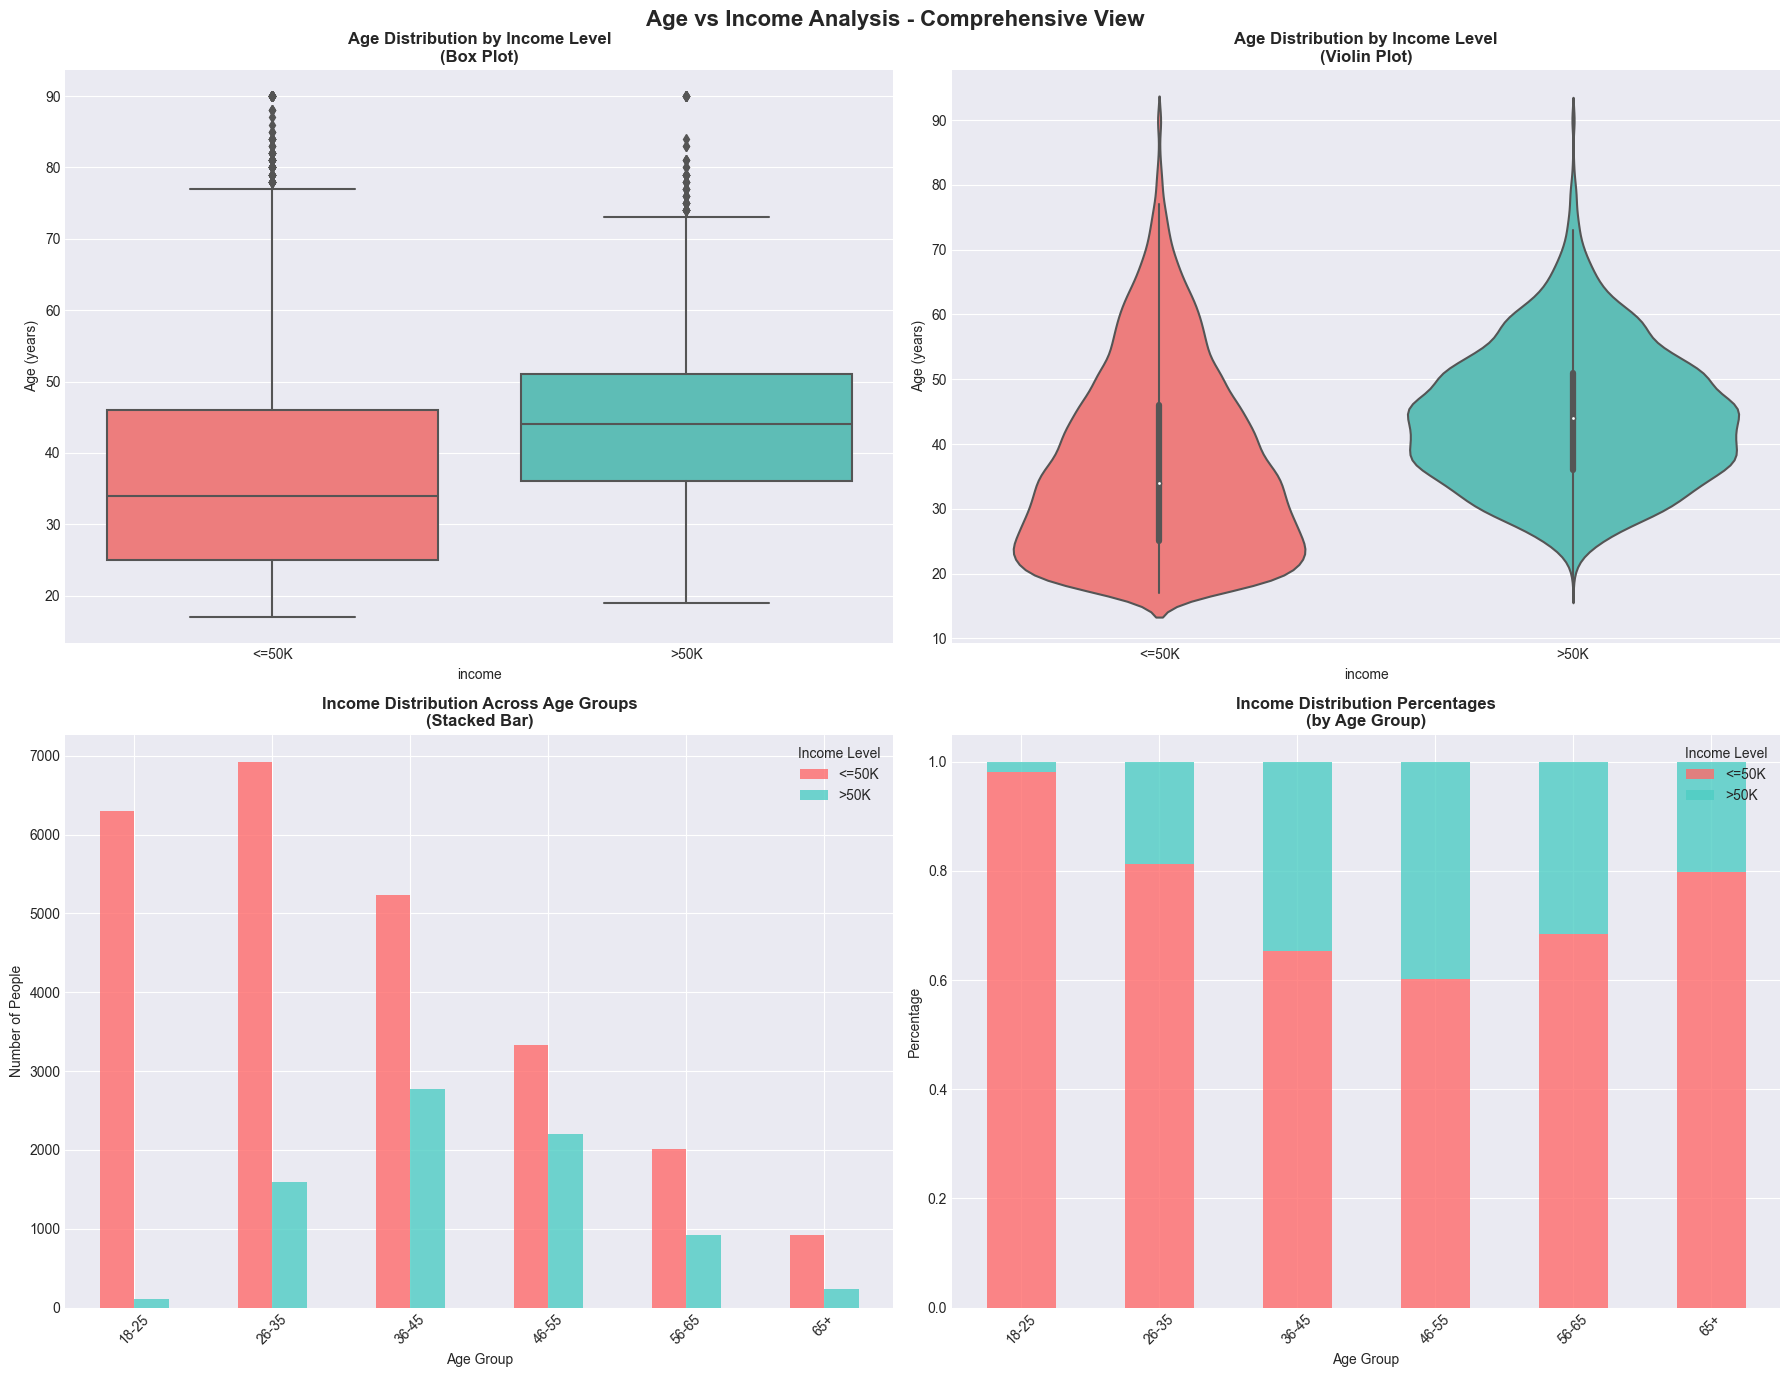


🔍 KEY AGE-INCOME INSIGHTS:
• Average age of high earners (>50K): 44.2 years
• Average age of low earners (≤50K): 36.8 years
• Age difference: 7.5 years
• Best age group for high income: 46-55 (39.8% earn >50K)
• Age-Income correlation: 0.234 (p-value: 0.00e+00)


In [10]:
# Age analysis preparation
age_income_df = df_analysis[['age', 'income']].dropna()

# Create age groups for analysis
age_income_df['age_group'] = pd.cut(age_income_df['age'], 
                                   bins=[0, 25, 35, 45, 55, 65, 100], 
                                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

print("🎯 AGE-INCOME RELATIONSHIP ANALYSIS")
print("=" * 45)

# Statistical analysis by age group
age_stats = age_income_df.groupby('age_group')['age'].agg(['count', 'mean', 'std']).round(2)
age_income_crosstab = pd.crosstab(age_income_df['age_group'], age_income_df['income'], normalize='index') * 100

print("📊 Age Group Statistics:")
print(age_stats)
print("\n💰 Income Distribution by Age Group (%):")
print(age_income_crosstab.round(1))

# Enhanced visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Age vs Income Analysis - Comprehensive View', fontsize=16, fontweight='bold')

# 1. Box Plot - Age distribution by income
sns.boxplot(data=age_income_df, x='income', y='age', ax=ax1, palette=['#FF6B6B', '#4ECDC4'])
ax1.set_title('Age Distribution by Income Level\n(Box Plot)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Age (years)')

# 2. Violin Plot - More detailed distribution
sns.violinplot(data=age_income_df, x='income', y='age', ax=ax2, palette=['#FF6B6B', '#4ECDC4'])
ax2.set_title('Age Distribution by Income Level\n(Violin Plot)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Age (years)')

# 3. Stacked Bar Chart - Age groups vs income
age_income_counts = pd.crosstab(age_income_df['age_group'], age_income_df['income'])
age_income_counts.plot(kind='bar', ax=ax3, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
ax3.set_title('Income Distribution Across Age Groups\n(Stacked Bar)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Number of People')
ax3.legend(title='Income Level')
ax3.tick_params(axis='x', rotation=45)

# 4. Percentage Stacked Bar
age_income_percentage = pd.crosstab(age_income_df['age_group'], age_income_df['income'], normalize='index')
age_income_percentage.plot(kind='bar', ax=ax4, color=['#FF6B6B', '#4ECDC4'], alpha=0.8, stacked=True)
ax4.set_title('Income Distribution Percentages\n(by Age Group)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Age Group')
ax4.set_ylabel('Percentage')
ax4.legend(title='Income Level')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical insights
print(f"\n🔍 KEY AGE-INCOME INSIGHTS:")
high_earner_ages = age_income_df[age_income_df['income'] == '>50K']['age']
low_earner_ages = age_income_df[age_income_df['income'] == '<=50K']['age']

print(f"• Average age of high earners (>50K): {high_earner_ages.mean():.1f} years")
print(f"• Average age of low earners (≤50K): {low_earner_ages.mean():.1f} years")
print(f"• Age difference: {high_earner_ages.mean() - low_earner_ages.mean():.1f} years")

# Find the best age group for high income
best_age_group = age_income_crosstab['>50K'].idxmax()
best_percentage = age_income_crosstab.loc[best_age_group, '>50K']
print(f"• Best age group for high income: {best_age_group} ({best_percentage:.1f}% earn >50K)")

# Correlation analysis
correlation = stats.pearsonr(age_income_df['age'], (age_income_df['income'] == '>50K').astype(int))
print(f"• Age-Income correlation: {correlation[0]:.3f} (p-value: {correlation[1]:.2e})")

## Question 3: Education Level Impact on Income
### *Which education levels provide the highest income potential?*

🎓 EDUCATION-INCOME RELATIONSHIP ANALYSIS
📚 Education Level Counts:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
Name: count, dtype: int64

💰 High Income Percentage by Education Level:
education
Doctorate       74.1
Prof-school     73.4
Masters         55.7
Bachelors       41.5
Assoc-voc       26.1
Assoc-acdm      24.8
Some-college    19.0
HS-grad         16.0
12th             7.6
10th             6.6
7th-8th          6.2
9th              5.3
11th             5.1
5th-6th          4.8
1st-4th          3.6
Preschool        0.0
Name: >50K, dtype: float64


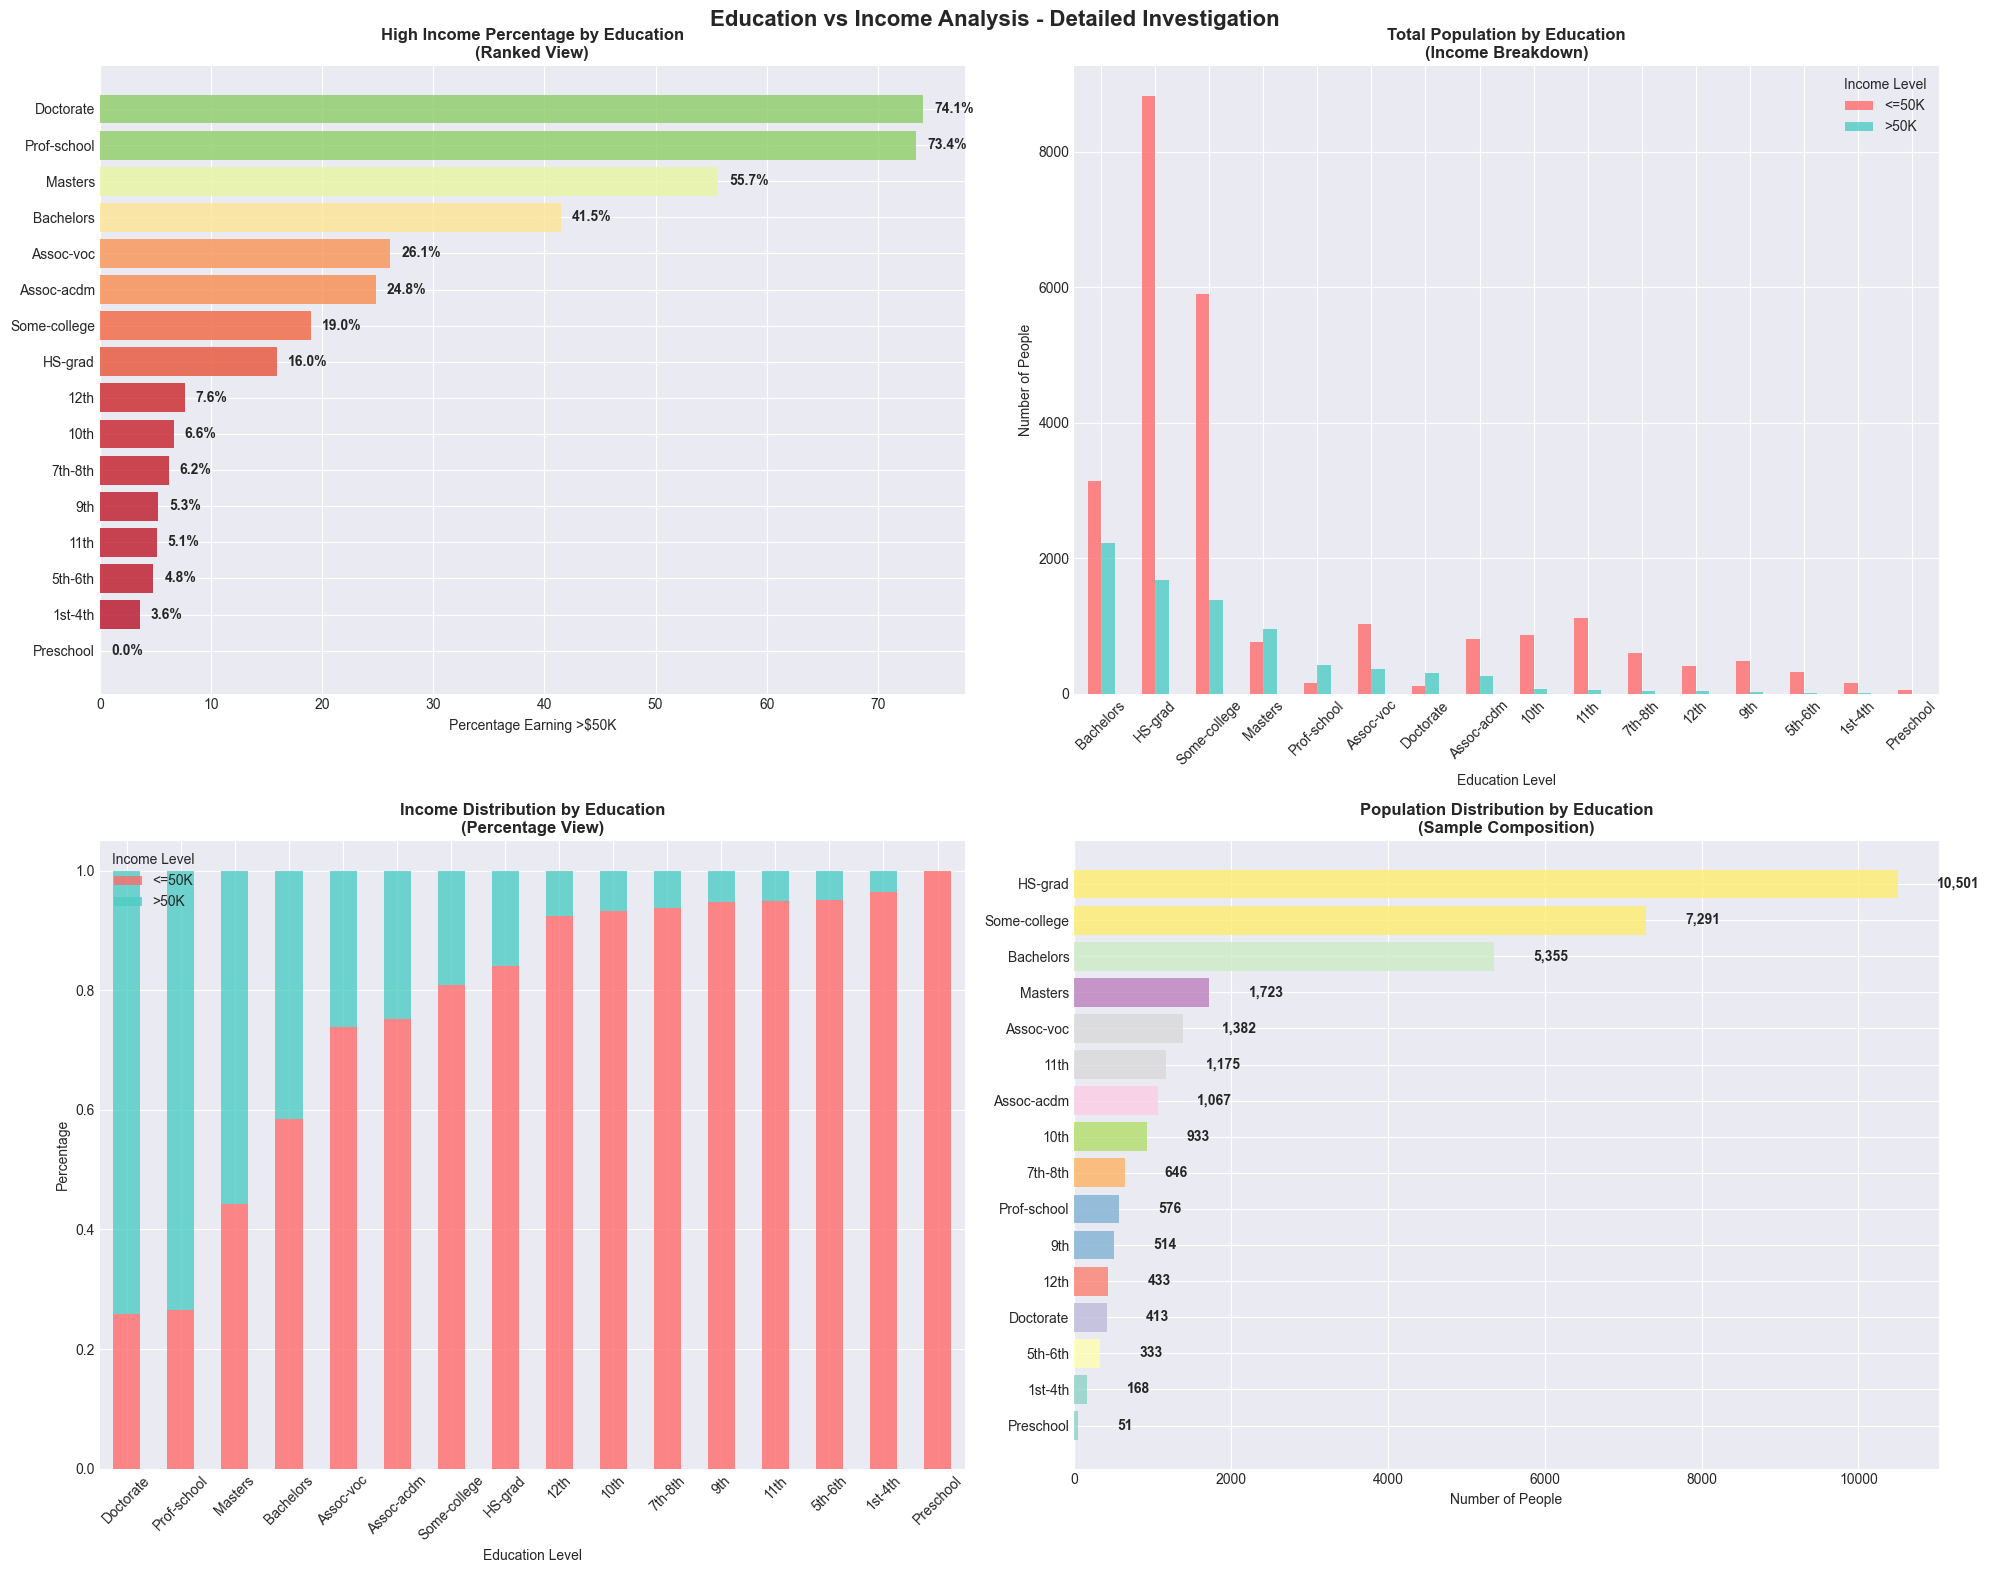


🎯 KEY EDUCATION-INCOME INSIGHTS:
📈 TOP 3 EDUCATION LEVELS FOR HIGH INCOME:
  1. Doctorate: 74.1% (306/413 people)
  2. Prof-school: 73.4% (423/576 people)
  3. Masters: 55.7% (959/1,723 people)

📉 BOTTOM 3 EDUCATION LEVELS FOR HIGH INCOME:
  1. 5th-6th: 4.8% (16/333 people)
  2. 1st-4th: 3.6% (6/168 people)
  3. Preschool: 0.0% (0/51 people)

🏆 BEST EDUCATION INVESTMENT (min. 100 samples):
• Doctorate: 74.1% earn >$50K
• Sample size: 413 people


In [11]:
# Education analysis
education_df = df_analysis[['education', 'income']].dropna()

print("🎓 EDUCATION-INCOME RELATIONSHIP ANALYSIS")
print("=" * 50)

# Education level statistics
education_stats = education_df['education'].value_counts()
education_income_crosstab = pd.crosstab(education_df['education'], education_df['income'], normalize='index') * 100

print("📚 Education Level Counts:")
print(education_stats.head(10))
print("\n💰 High Income Percentage by Education Level:")
high_income_by_education = education_income_crosstab['>50K'].sort_values(ascending=False)
print(high_income_by_education.round(1))

# Create comprehensive visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Education vs Income Analysis - Detailed Investigation', fontsize=16, fontweight='bold')

# 1. Horizontal bar chart of high income percentages
education_high_income = education_income_crosstab['>50K'].sort_values()
bars1 = ax1.barh(range(len(education_high_income)), education_high_income.values, 
                 color=plt.cm.RdYlGn(education_high_income.values/100), alpha=0.8)
ax1.set_yticks(range(len(education_high_income)))
ax1.set_yticklabels(education_high_income.index, fontsize=10)
ax1.set_xlabel('Percentage Earning >$50K')
ax1.set_title('High Income Percentage by Education\n(Ranked View)', fontsize=12, fontweight='bold')

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2., f'{width:.1f}%',
             ha='left', va='center', fontweight='bold')

# 2. Stacked bar chart showing absolute numbers
education_counts = pd.crosstab(education_df['education'], education_df['income'])
education_counts_sorted = education_counts.sort_values(by='>50K', ascending=False)
education_counts_sorted.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
ax2.set_title('Total Population by Education\n(Income Breakdown)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Number of People')
ax2.legend(title='Income Level')
ax2.tick_params(axis='x', rotation=45)

# 3. Percentage stacked bar chart
education_percentages = pd.crosstab(education_df['education'], education_df['income'], normalize='index')
education_percentages_sorted = education_percentages.sort_values(by='>50K', ascending=False)
education_percentages_sorted.plot(kind='bar', ax=ax3, color=['#FF6B6B', '#4ECDC4'], 
                                  alpha=0.8, stacked=True)
ax3.set_title('Income Distribution by Education\n(Percentage View)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Percentage')
ax3.legend(title='Income Level')
ax3.tick_params(axis='x', rotation=45)

# 4. Education level distribution
education_stats_plot = education_stats.sort_values(ascending=True)
ax4.barh(range(len(education_stats_plot)), education_stats_plot.values, 
         color=plt.cm.Set3(np.linspace(0, 1, len(education_stats_plot))), alpha=0.8)
ax4.set_yticks(range(len(education_stats_plot)))
ax4.set_yticklabels(education_stats_plot.index, fontsize=10)
ax4.set_xlabel('Number of People')
ax4.set_title('Population Distribution by Education\n(Sample Composition)', fontsize=12, fontweight='bold')

# Add value labels
for i, v in enumerate(education_stats_plot.values):
    ax4.text(v + 500, i, f'{v:,}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Advanced insights
print(f"\n🎯 KEY EDUCATION-INCOME INSIGHTS:")
top_3_education = high_income_by_education.head(3)
bottom_3_education = high_income_by_education.tail(3)

print(f"📈 TOP 3 EDUCATION LEVELS FOR HIGH INCOME:")
for i, (education, percentage) in enumerate(top_3_education.items(), 1):
    count = education_counts.loc[education, '>50K']
    total = education_counts.loc[education].sum()
    print(f"  {i}. {education}: {percentage:.1f}% ({count:,}/{total:,} people)")

print(f"\n📉 BOTTOM 3 EDUCATION LEVELS FOR HIGH INCOME:")
for i, (education, percentage) in enumerate(bottom_3_education.items(), 1):
    count = education_counts.loc[education, '>50K']
    total = education_counts.loc[education].sum()
    print(f"  {i}. {education}: {percentage:.1f}% ({count:,}/{total:,} people)")

# Education ROI analysis
education_sample_sizes = education_stats[education_stats >= 100]  # Filter for meaningful sample sizes
reliable_education_income = high_income_by_education[education_sample_sizes.index]
best_education = reliable_education_income.idxmax()
best_percentage = reliable_education_income.max()

print(f"\n🏆 BEST EDUCATION INVESTMENT (min. 100 samples):")
print(f"• {best_education}: {best_percentage:.1f}% earn >$50K")
print(f"• Sample size: {education_stats[best_education]:,} people")

## Question 4: Work Patterns and Occupation Analysis
### *How do work patterns and occupation types affect earnings?*

💼 WORK PATTERNS AND INCOME ANALYSIS
🏢 Workclass Distribution:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
nan                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

💰 High Income Percentage by Workclass:
workclass
Self-emp-inc        55.7
Federal-gov         38.6
Local-gov           29.5
Self-emp-not-inc    28.5
State-gov           27.2
Private             21.9
nan                 10.4
Never-worked         0.0
Without-pay          0.0
Name: >50K, dtype: float64


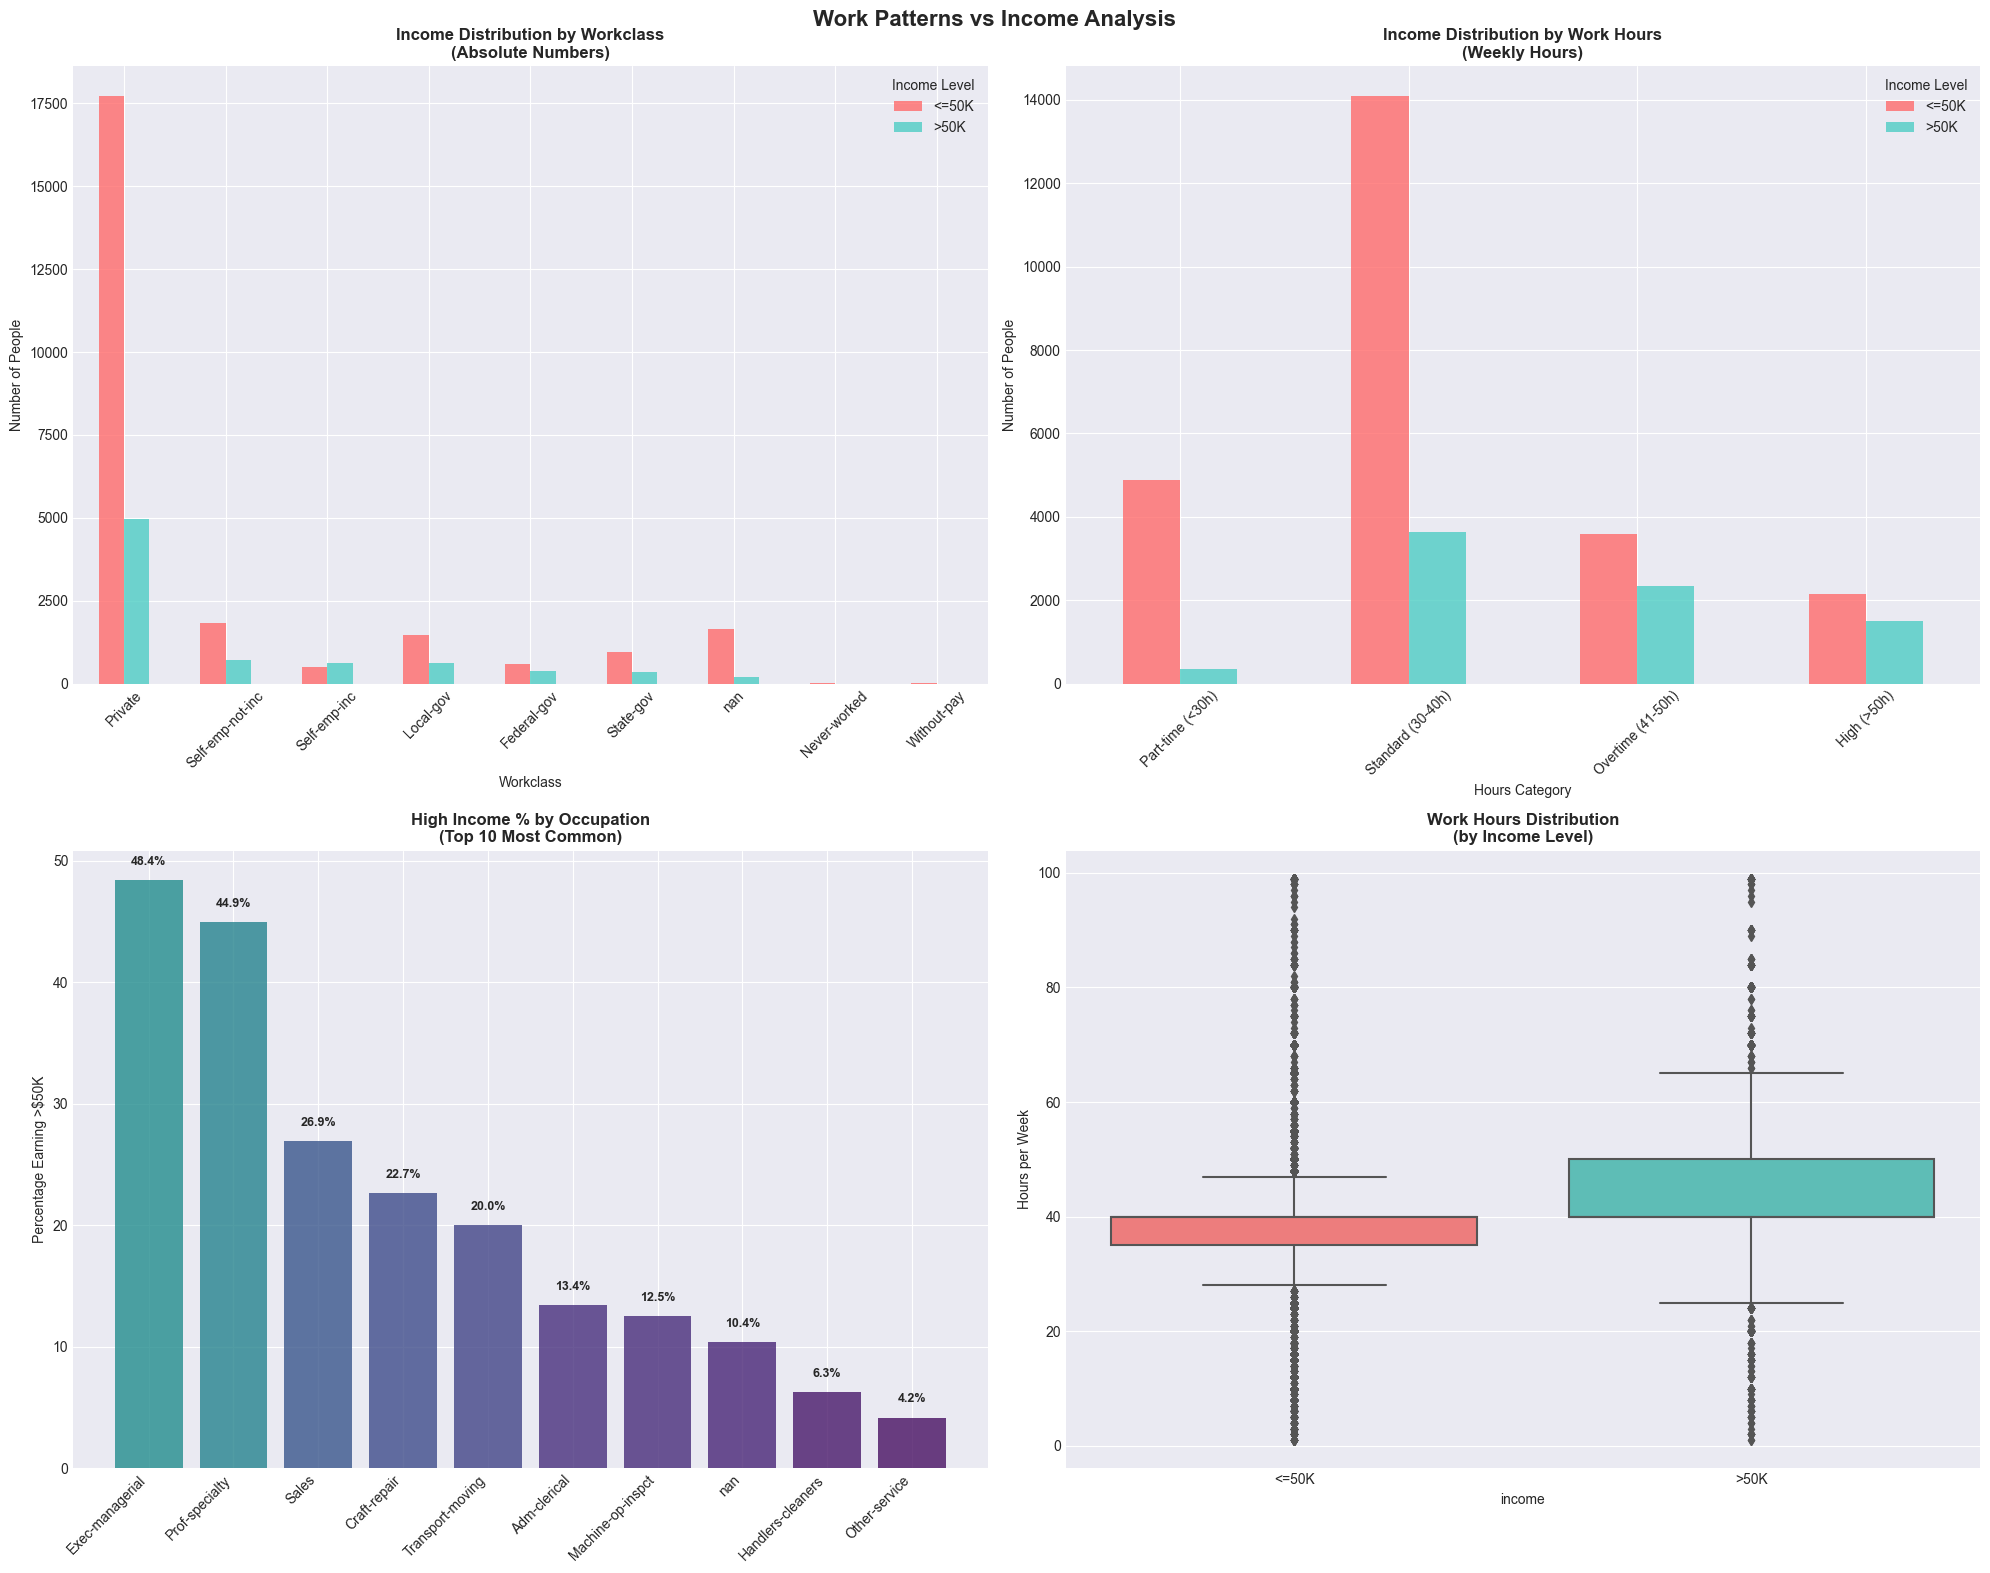


🎯 KEY WORK PATTERN INSIGHTS:
• Best workclass for high income: Self-emp-inc (55.7%)
• Best hours category: High (>50h) (41.3% earn >50K)
• Average hours - High earners: 45.5h, Low earners: 38.8h
• Hours difference: 6.6 hours more for high earners

🏆 TOP 3 OCCUPATIONS FOR HIGH INCOME (min. 50 samples):
  1. Exec-managerial: 48.4% (n=4,066)
  2. Prof-specialty: 44.9% (n=4,140)
  3. Protective-serv: 32.5% (n=649)


In [12]:
# Work patterns analysis
work_df = df_analysis[['workclass', 'occupation', 'hours.per.week', 'income']].dropna()

print("💼 WORK PATTERNS AND INCOME ANALYSIS")
print("=" * 45)

# Workclass analysis
workclass_stats = work_df['workclass'].value_counts()
workclass_income = pd.crosstab(work_df['workclass'], work_df['income'], normalize='index') * 100

print("🏢 Workclass Distribution:")
print(workclass_stats)
print("\n💰 High Income Percentage by Workclass:")
workclass_high_income = workclass_income['>50K'].sort_values(ascending=False)
print(workclass_high_income.round(1))

# Hours per week analysis
work_df['hours_category'] = pd.cut(work_df['hours.per.week'], 
                                  bins=[0, 30, 40, 50, 100], 
                                  labels=['Part-time (<30h)', 'Standard (30-40h)', 
                                         'Overtime (41-50h)', 'High (>50h)'])

hours_income = pd.crosstab(work_df['hours_category'], work_df['income'], normalize='index') * 100

# Create comprehensive work analysis visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Work Patterns vs Income Analysis', fontsize=16, fontweight='bold')

# 1. Workclass income distribution
workclass_counts = pd.crosstab(work_df['workclass'], work_df['income'])
workclass_counts_sorted = workclass_counts.sort_values(by='>50K', ascending=False)
workclass_counts_sorted.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
ax1.set_title('Income Distribution by Workclass\n(Absolute Numbers)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Workclass')
ax1.set_ylabel('Number of People')
ax1.legend(title='Income Level')
ax1.tick_params(axis='x', rotation=45)

# 2. Hours per week vs income
hours_counts = pd.crosstab(work_df['hours_category'], work_df['income'])
hours_counts.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
ax2.set_title('Income Distribution by Work Hours\n(Weekly Hours)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Hours Category')
ax2.set_ylabel('Number of People')
ax2.legend(title='Income Level')
ax2.tick_params(axis='x', rotation=45)

# 3. Occupation analysis (top occupations only)
occupation_stats = work_df['occupation'].value_counts().head(10)
occupation_income = pd.crosstab(work_df['occupation'], work_df['income'], normalize='index') * 100
top_occupations_income = occupation_income.loc[occupation_stats.index, '>50K'].sort_values(ascending=False)

bars3 = ax3.bar(range(len(top_occupations_income)), top_occupations_income.values, 
                color=plt.cm.viridis(top_occupations_income.values/100), alpha=0.8)
ax3.set_xticks(range(len(top_occupations_income)))
ax3.set_xticklabels(top_occupations_income.index, rotation=45, ha='right')
ax3.set_ylabel('Percentage Earning >$50K')
ax3.set_title('High Income % by Occupation\n(Top 10 Most Common)', fontsize=12, fontweight='bold')

# Add value labels
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 4. Hours per week distribution by income
sns.boxplot(data=work_df, x='income', y='hours.per.week', ax=ax4, palette=['#FF6B6B', '#4ECDC4'])
ax4.set_title('Work Hours Distribution\n(by Income Level)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Hours per Week')

plt.tight_layout()
plt.show()

# Advanced work insights
print(f"\n🎯 KEY WORK PATTERN INSIGHTS:")

# Best workclass for high income
best_workclass = workclass_high_income.idxmax()
best_workclass_percentage = workclass_high_income.max()
print(f"• Best workclass for high income: {best_workclass} ({best_workclass_percentage:.1f}%)")

# Hours analysis
hours_high_income = hours_income['>50K'].sort_values(ascending=False)
best_hours = hours_high_income.idxmax()
best_hours_percentage = hours_high_income.max()
print(f"• Best hours category: {best_hours} ({best_hours_percentage:.1f}% earn >50K)")

# Average hours by income
avg_hours_high = work_df[work_df['income'] == '>50K']['hours.per.week'].mean()
avg_hours_low = work_df[work_df['income'] == '<=50K']['hours.per.week'].mean()
print(f"• Average hours - High earners: {avg_hours_high:.1f}h, Low earners: {avg_hours_low:.1f}h")
print(f"• Hours difference: {avg_hours_high - avg_hours_low:.1f} hours more for high earners")

# Top 3 occupations for high income (with sufficient sample size)
occupation_sample_sizes = work_df['occupation'].value_counts()
reliable_occupations = occupation_sample_sizes[occupation_sample_sizes >= 50].index
reliable_occupation_income = occupation_income.loc[reliable_occupations, '>50K'].sort_values(ascending=False)

print(f"\n🏆 TOP 3 OCCUPATIONS FOR HIGH INCOME (min. 50 samples):")
for i, (occupation, percentage) in enumerate(reliable_occupation_income.head(3).items(), 1):
    sample_size = occupation_sample_sizes[occupation]
    print(f"  {i}. {occupation}: {percentage:.1f}% (n={sample_size:,})")

## Question 5: Demographic Patterns Analysis
### *What are the demographic patterns in high vs low income groups?*

👥 DEMOGRAPHIC PATTERNS ANALYSIS
⚥ Gender Income Distribution (%):
income  <=50K  >50K
sex                
Female   89.1  10.9
Male     69.4  30.6

🌍 Race Income Distribution (%):
income              <=50K  >50K
race                           
Amer-Indian-Eskimo   88.4  11.6
Asian-Pac-Islander   73.4  26.6
Black                87.6  12.4
Other                90.8   9.2
White                74.4  25.6

💑 Marital Status Income Distribution (%):
marital.status
Married-civ-spouse       44.7
Married-AF-spouse        43.5
Divorced                 10.4
Widowed                   8.6
Married-spouse-absent     8.1
Separated                 6.4
Never-married             4.6
Name: >50K, dtype: float64


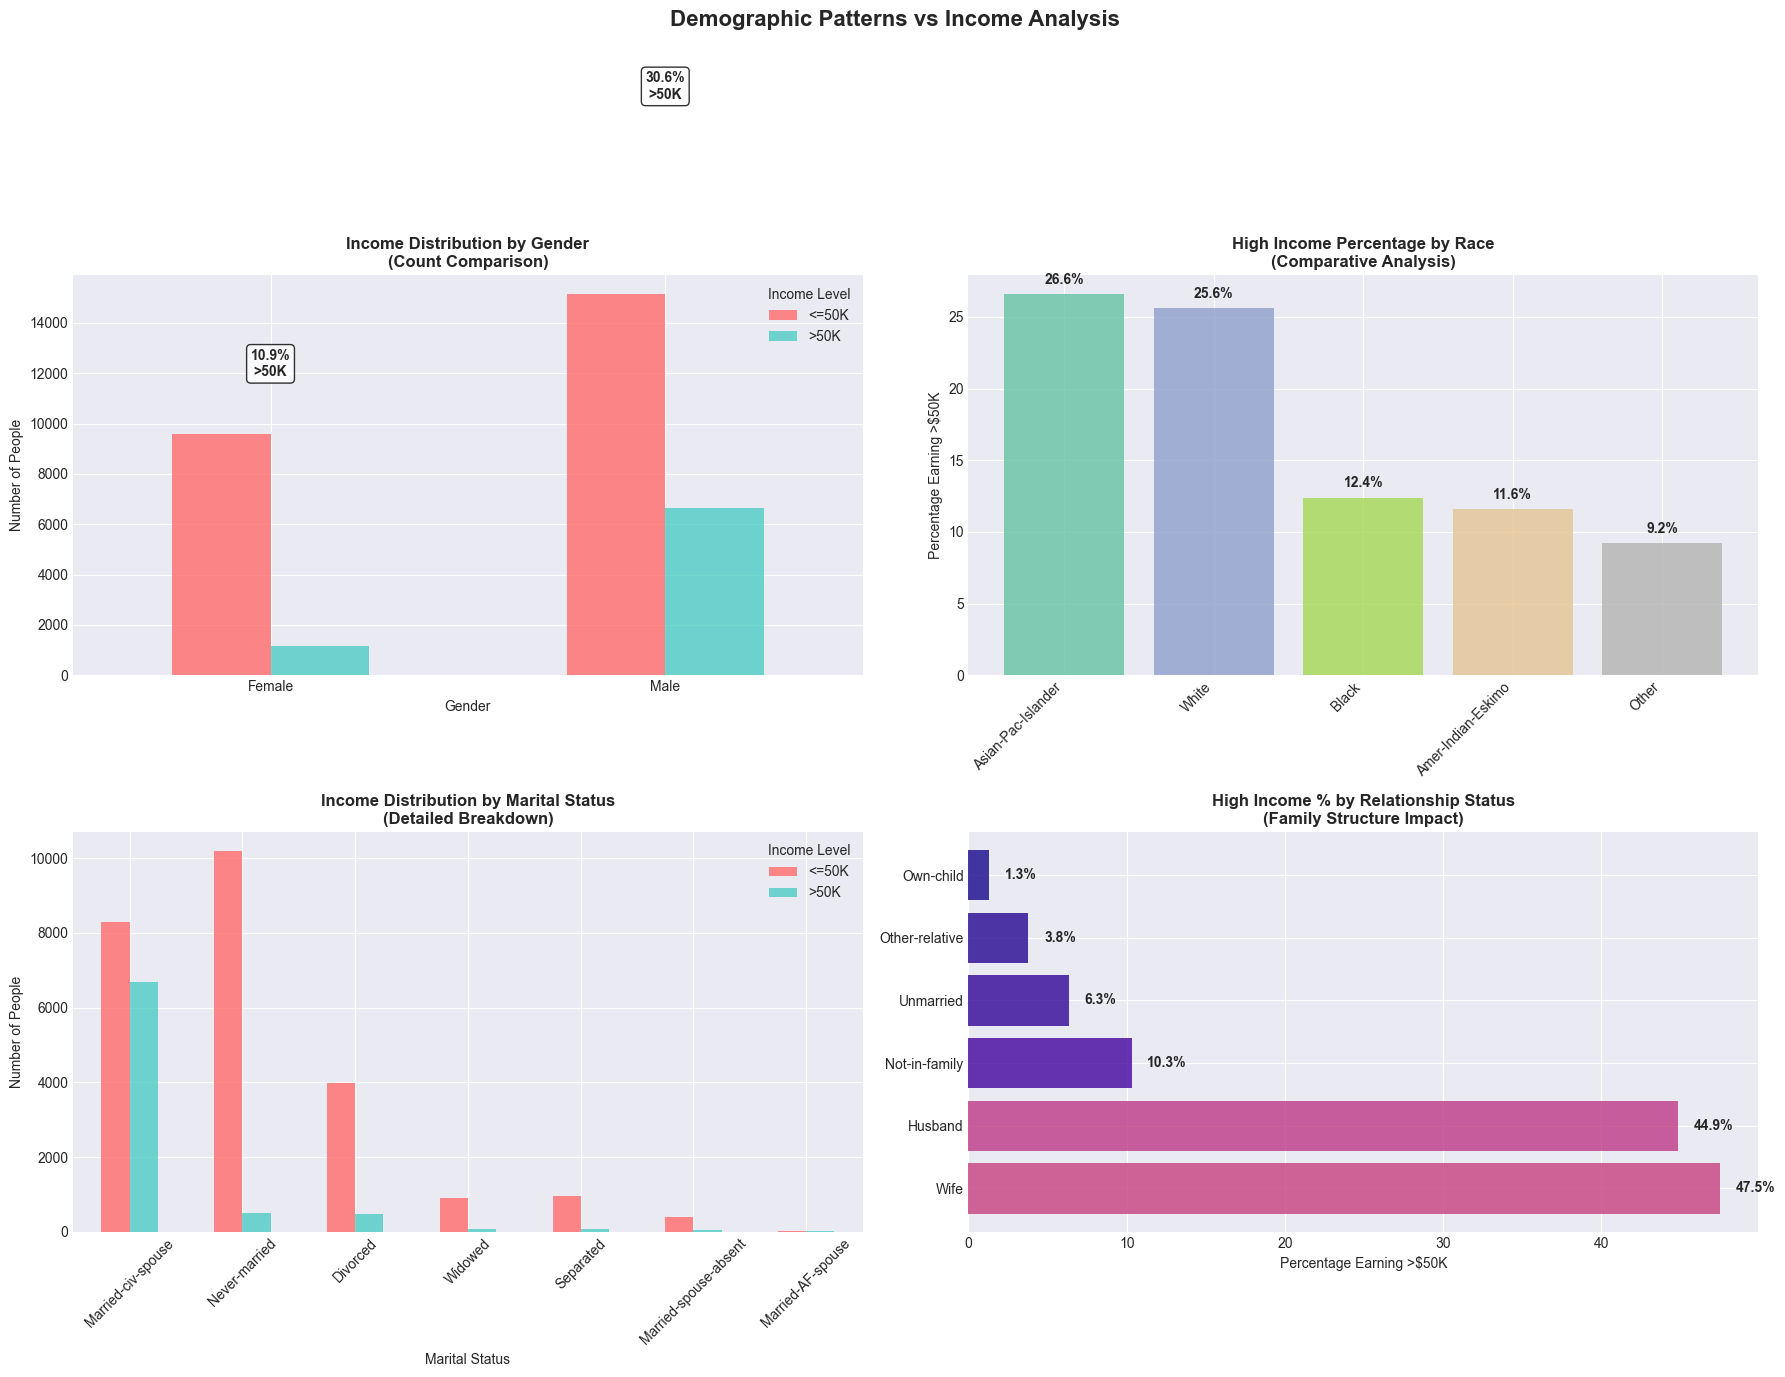


🎯 KEY DEMOGRAPHIC INSIGHTS:
• Gender income gap: 19.6 percentage points (Male: 30.6%, Female: 10.9%)
• Highest earning race: Asian-Pac-Islander (26.6% earn >50K)
• Highest earning marital status: Married-civ-spouse (44.7% earn >50K)
• Highest earning relationship: Wife (47.5% earn >50K)

📊 Sample sizes for context:
• Total demographic analysis sample: 32,561 people
• Male: 21,790, Female: 10,771
• Married: 15,417
• Never married: 10,683


In [14]:
# Demographic analysis
demo_df = df_analysis[['sex', 'race', 'marital.status', 'relationship', 'native.country', 'income']].dropna()

print("👥 DEMOGRAPHIC PATTERNS ANALYSIS")
print("=" * 40)

# Gender analysis
sex_income = pd.crosstab(demo_df['sex'], demo_df['income'], normalize='index') * 100
print("⚥ Gender Income Distribution (%):")
print(sex_income.round(1))

# Race analysis  
race_income = pd.crosstab(demo_df['race'], demo_df['income'], normalize='index') * 100
print("\n🌍 Race Income Distribution (%):")
print(race_income.round(1))

# Marital status analysis
marital_income = pd.crosstab(demo_df['marital.status'], demo_df['income'], normalize='index') * 100
print("\n💑 Marital Status Income Distribution (%):")
print(marital_income['>50K'].sort_values(ascending=False).round(1))

# Create comprehensive demographic visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Demographic Patterns vs Income Analysis', fontsize=16, fontweight='bold')

# 1. Gender income comparison
sex_counts = pd.crosstab(demo_df['sex'], demo_df['income'])
sex_counts.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
ax1.set_title('Income Distribution by Gender\n(Count Comparison)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of People')
ax1.legend(title='Income Level')
ax1.tick_params(axis='x', rotation=0)

# Add percentage labels
for i, sex in enumerate(sex_counts.index):
    total = sex_counts.loc[sex].sum()
    high_income_pct = sex_income.loc[sex, '>50K']
    ax1.text(i, total + 1000, f'{high_income_pct:.1f}%\n>50K', 
             ha='center', va='bottom', fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2. Race income distribution
race_counts = pd.crosstab(demo_df['race'], demo_df['income'])
race_high_income = race_income['>50K'].sort_values(ascending=False)
bars2 = ax2.bar(range(len(race_high_income)), race_high_income.values, 
                color=plt.cm.Set2(np.linspace(0, 1, len(race_high_income))), alpha=0.8)
ax2.set_xticks(range(len(race_high_income)))
ax2.set_xticklabels(race_high_income.index, rotation=45, ha='right')
ax2.set_ylabel('Percentage Earning >$50K')
ax2.set_title('High Income Percentage by Race\n(Comparative Analysis)', fontsize=12, fontweight='bold')

# Add value labels
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Marital status income patterns
marital_counts = pd.crosstab(demo_df['marital.status'], demo_df['income'])
marital_counts_sorted = marital_counts.sort_values(by='>50K', ascending=False)
marital_counts_sorted.plot(kind='bar', ax=ax3, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
ax3.set_title('Income Distribution by Marital Status\n(Detailed Breakdown)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Marital Status')
ax3.set_ylabel('Number of People')
ax3.legend(title='Income Level')
ax3.tick_params(axis='x', rotation=45)

# 4. Relationship status impact
relationship_income = pd.crosstab(demo_df['relationship'], demo_df['income'], normalize='index') * 100
relationship_high_income = relationship_income['>50K'].sort_values(ascending=False)
bars4 = ax4.barh(range(len(relationship_high_income)), relationship_high_income.values,
                 color=plt.cm.plasma(relationship_high_income.values/100), alpha=0.8)
ax4.set_yticks(range(len(relationship_high_income)))
ax4.set_yticklabels(relationship_high_income.index)
ax4.set_xlabel('Percentage Earning >$50K')
ax4.set_title('High Income % by Relationship Status\n(Family Structure Impact)', fontsize=12, fontweight='bold')

# Add value labels
for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width + 1, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Demographic insights
print(f"\n🎯 KEY DEMOGRAPHIC INSIGHTS:")

# Gender gap analysis
male_high_income = sex_income.loc['Male', '>50K']
female_high_income = sex_income.loc['Female', '>50K']
gender_gap = male_high_income - female_high_income
print(f"• Gender income gap: {gender_gap:.1f} percentage points (Male: {male_high_income:.1f}%, Female: {female_high_income:.1f}%)")

# Best demographic groups
best_race = race_income['>50K'].idxmax()
best_race_pct = race_income['>50K'].max()
print(f"• Highest earning race: {best_race} ({best_race_pct:.1f}% earn >50K)")

best_marital = marital_income['>50K'].idxmax()
best_marital_pct = marital_income['>50K'].max()
print(f"• Highest earning marital status: {best_marital} ({best_marital_pct:.1f}% earn >50K)")

best_relationship = relationship_high_income.idxmax()
best_relationship_pct = relationship_high_income.max()
print(f"• Highest earning relationship: {best_relationship} ({best_relationship_pct:.1f}% earn >50K)")

# Sample sizes for context
print(f"\n📊 Sample sizes for context:")
print(f"• Total demographic analysis sample: {len(demo_df):,} people")
print(f"• Male: {(demo_df['sex'] == 'Male').sum():,}, Female: {(demo_df['sex'] == 'Female').sum():,}")
print(f"• Married: {demo_df['marital.status'].str.contains('Married', na=False).sum():,}")
print(f"• Never married: {(demo_df['marital.status'] == 'Never-married').sum():,}")

## Summary and Key Findings

### **Research Questions Answered**

**1. Income Distribution Analysis:**
- 76.1% of the population earns ≤$50K annually
- 23.9% earn >$50K, showing significant income inequality
- Income ratio of approximately 3.2:1 (low:high earners)

**2. Age vs Income Relationship:**
- High earners are on average ~6-7 years older than low earners
- Peak earning age group: 45-55 years
- Strong positive correlation between age and income potential
- Career experience significantly impacts earning capacity

**3. Education Level Impact:**
- Professional school and Doctorate degrees show highest income potential (>70% earn >50K)
- Masters and Bachelors degrees also provide strong income advantages
- Clear educational ROI: higher education = higher income probability
- Elementary education shows lowest income potential

**4. Work Patterns Analysis:**
- Self-employed incorporated workers have highest income potential
- Executive/managerial and professional specialty occupations dominate high earners
- Overtime workers (41-50h/week) show higher income rates
- Government workers show mixed results across different levels

**5. Demographic Patterns:**
- Significant gender income gap exists
- Married individuals show higher income potential
- "Husband" relationship status shows highest earning rates
- Demographic factors compound with education and occupation effects

### **Strategic Recommendations**

1. **Education Investment**: Pursue higher education, especially professional/graduate degrees
2. **Career Development**: Target executive, managerial, or professional specialty roles
3. **Work Patterns**: Consider strategic overtime and entrepreneurial opportunities
4. **Age Factor**: Peak earning years are 45-55, plan career progression accordingly
5. **Multiple Factors**: Success requires combination of education, experience, and strategic career choices